# King County Project - Valeria Minervini
## Data cleaning and wrangling 

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
df = pd.read_csv("Desktop/Mid-Term-Project/regression_data.csv")

In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [5]:
df.drop(['id'], axis=1, inplace=True) #I already spot a column that I think will not be useful for my analysis, 
#so I decide to delete it.

In [6]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [7]:
#Check NaNs Total
df.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
df.describe()
#I find a lot of zeros in the model, but for a reason:
#waterfront is a boolean = 1 or 0 
#view refers to zero for a very bad view
#in sqft_basement, if it's zero, I assume there is no basement 
#yr_renovated - if it's zero, I assume it's never been renovated 

##As they all mean something, for now I do not delete or replace the zeros. 
#However I will bin these values to have a better understanding of the model. 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [9]:
# The year renovated most likely has an impact on the price. 
#I will create a new column to bin it and store the renovation grades. 
#This will help me understand the meaning of the correlation better.
renovation_grade = []

# For each row in the column,
for x in df['yr_renovated']:
    if x >= 2010:
        renovation_grade.append('RR')
    elif x < 2010 and x >= 1990:
        renovation_grade.append('R')
    elif x < 1990 and x != 0:
        renovation_grade.append('OR')
    else:
        renovation_grade.append('NR')
        
# Create a column from the list
df['renovation_grade'] = renovation_grade

#RR = recently renovated
#R = renovated
#OR = old renovated (i.e. a long time ago)
# NR = never renovated

In [10]:
df #I check if the new column is there

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_grade
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,NR
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,R
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,NR
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,NR
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,NR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,NR
21593,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,NR
21594,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,NR
21595,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,NR


In [11]:
list(np.unique(df['view']))

[0, 1, 2, 3, 4]

In [12]:
# The view most likely has an impact on the price. I will create a new column to bin it to have a better understanding of the data. 
view_grade = []

# For each row in the column,
for x in df['view']:
    if x == 0:
        view_grade.append('very bad/no view')
    elif x == 1:
        view_grade.append('bad view')
    elif x == 2:
        view_grade.append('good view')
    elif x ==3:
        view_grade.append('very good view')
    else:
        view_grade.append('excellent view')
        
# Create a column from the list
df['view_grade'] = view_grade

In [13]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_grade,view_grade
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,NR,very bad/no view
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,R,very bad/no view
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,NR,very bad/no view
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,NR,very bad/no view
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,NR,very bad/no view
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,NR,very bad/no view
21593,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,NR,very bad/no view
21594,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,NR,very bad/no view
21595,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,NR,very bad/no view


In [14]:
list(np.unique(df['view_grade']))

['bad view',
 'excellent view',
 'good view',
 'very bad/no view',
 'very good view']

In [15]:
df['view_grade'].value_counts()

very bad/no view    19475
good view             961
very good view        510
bad view              332
excellent view        319
Name: view_grade, dtype: int64

In [16]:
df['renovation_grade'].value_counts() 

NR    20683
R       454
OR      274
RR      186
Name: renovation_grade, dtype: int64

In [17]:
df.drop(['view_grade'], axis=1, inplace=True) #I decide to drop the new column. Keeping the number is better for the analysis. 
#Turning them into words was not that useful for the analysis but it helped me visualize the list

In [18]:
# I noticed that the sqft_lot and sqft_living space in 2015 might be a misleading factor for the price prediction if the house was sold before that time.
#For this reason, I want to make this clear and create a new table that contains the sqft size for both at the time when the house was sold.

#As first step, I need to change the date from object to date time. I will need it to extrapolate the year only and to work with my loop function.
df['date'] = pd.to_datetime(df['date'])

In [19]:
#I create a single-column data frame with the column "date"
df["year_sold"] = df['date'].dt.year

In [20]:
df['year_sold']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year_sold, Length: 21597, dtype: int64

In [21]:
#Finally, I create a function that selects the living space from sqft_living if the house was sold in 2014, 
#or sqft_living15 if the house was sold in 2015.
x = []

for n, i in enumerate(df.year_sold):
    if i == 2014:
        x.append(df['sqft_living'][n])
    else:
        x.append(df['sqft_living15'][n])


df['living_size_year_sale'] = x

In [22]:
#now do the same with sql_lot. the size of the lot is also an important indicator, as it implies the presence of a garden, a parking area, ecc...

In [23]:
x = []

for n, i in enumerate(df.year_sold):
    if i == 2014:
        x.append(df['sqft_lot'][n])
    else:
        x.append(df['sqft_lot15'][n])


df['lot_size_year_sale'] = x

In [24]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_grade,year_sold,living_size_year_sale,lot_size_year_sale
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,NR,2014,1180,5650
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,R,2014,2570,7242
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,NR,2015,2720,8062
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,NR,2014,1960,5000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,NR,2015,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,NR,2014,1530,1131
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,NR,2015,1830,7200
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,NR,2014,1020,1350
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,NR,2015,1410,1287


In [25]:
#As I do not need them anymore, I will delete the following columns:
df.drop(['sqft_living15'], axis=1, inplace=True)

In [26]:
df.drop(['sqft_lot15'], axis=1, inplace=True)

In [27]:
df.drop(['sqft_lot'], axis=1, inplace=True)

In [28]:
df.drop(['sqft_living'], axis=1, inplace=True)

In [29]:
#Now I will define numerical data in a function to visualize their correlation in the corr. matrix

numericals = df.select_dtypes(np.number)
numericals.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,year_sold,living_size_year_sale,lot_size_year_sale
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,221900,2014,1180,5650
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,538000,2014,2570,7242
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,180000,2015,2720,8062
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,604000,2014,1960,5000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,510000,2015,1800,7503


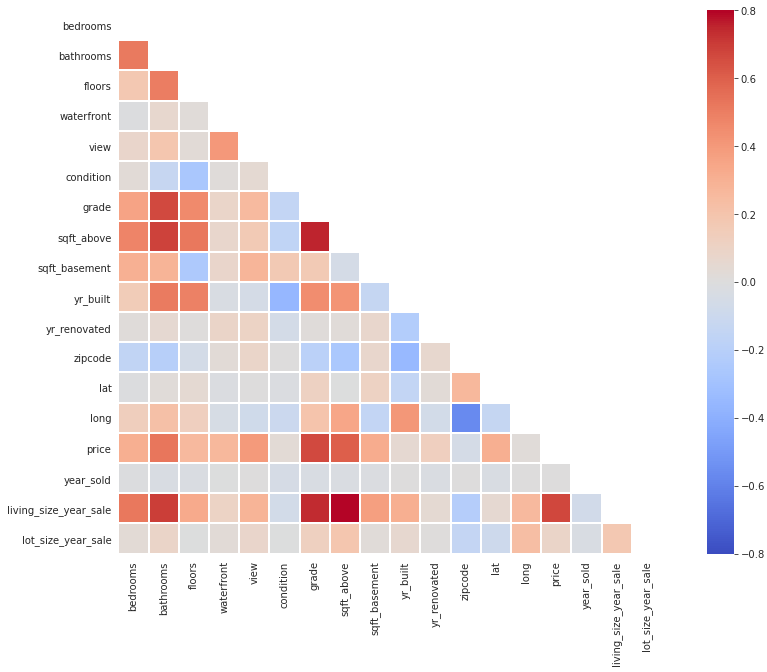

In [30]:
numericals = df.select_dtypes(np.number)
numericals.head()

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [31]:
df['sqft_basement']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

In [32]:
#As they have very little impact on the price, with a color that tends to zero, I decide to drop longitude and sqft_above.

df.drop(['long'], axis=1, inplace=True)

In [33]:
df.drop(['sqft_above'], axis=1, inplace=True)

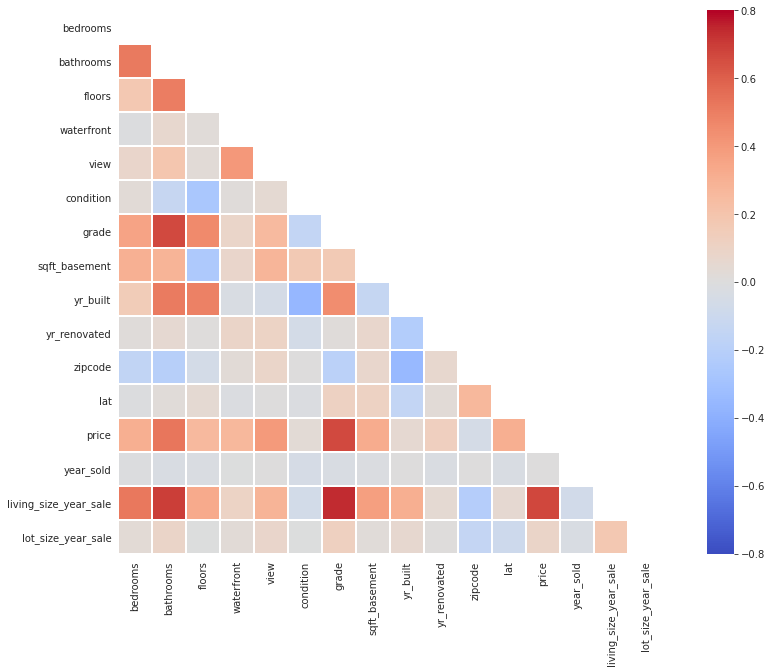

In [34]:
numericals = df.select_dtypes(np.number)
numericals.head()

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [35]:
#bathrooms and grade are highly correlated. A high grade implies high level of interior and exterior design, but I did not find
#any explanation related to the number or size of the bathooms. As this correlation is for now ambiguous, i will for now keep the two variables.

In [36]:
# I decide to bin the basement size as it will be easier to observe.
list(np.unique(df['sqft_basement']))

[0,
 10,
 20,
 40,
 50,
 60,
 65,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 143,
 145,
 150,
 160,
 170,
 172,
 176,
 180,
 190,
 200,
 207,
 210,
 220,
 225,
 230,
 235,
 240,
 243,
 248,
 250,
 260,
 265,
 266,
 270,
 274,
 276,
 280,
 283,
 290,
 295,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 374,
 380,
 390,
 400,
 410,
 414,
 415,
 417,
 420,
 430,
 435,
 440,
 450,
 460,
 470,
 475,
 480,
 490,
 500,
 506,
 508,
 510,
 515,
 516,
 518,
 520,
 530,
 540,
 550,
 556,
 560,
 570,
 580,
 588,
 590,
 600,
 602,
 610,
 620,
 630,
 640,
 650,
 652,
 660,
 666,
 670,
 680,
 690,
 700,
 704,
 710,
 720,
 730,
 740,
 750,
 760,
 768,
 770,
 780,
 784,
 790,
 792,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 861,
 862,
 870,
 875,
 880,
 890,
 894,
 900,
 906,
 910,
 915,
 920,
 930,
 935,
 940,
 946,
 950,
 960,
 970,
 980,
 990,
 1000,
 1008,
 1010,
 1020,
 1024,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1135,
 1140,
 1150,
 1160,
 1170,
 1180,

In [37]:
basement_grade = []

# For each row in the column,
for x in df['sqft_basement']:
    if x == 0:
        basement_grade.append('NB')
    elif x> 0 and x <= 500:
        basement_grade.append('D')
    elif x>500 and x<= 1000:
        basement_grade.append('C')
    elif x >1000 and x<= 2000:
        basement_grade.append('B')
    else:
        basement_grade.append('A')

# Create a column from the list
df['basement_grade'] = basement_grade

#where NB = "no basement" and D,C,B,A are just ordinal indicators, with A being the biggest and D the smallest.


In [38]:
df.shape

(21597, 19)

In [39]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,price,renovation_grade,year_sold,living_size_year_sale,lot_size_year_sale,basement_grade
0,2014-10-13,3,1.00,1.0,0,0,3,7,0,1955,0,98178,47.5112,221900,NR,2014,1180,5650,NB
1,2014-12-09,3,2.25,2.0,0,0,3,7,400,1951,1991,98125,47.7210,538000,R,2014,2570,7242,D
2,2015-02-25,2,1.00,1.0,0,0,3,6,0,1933,0,98028,47.7379,180000,NR,2015,2720,8062,NB
3,2014-12-09,4,3.00,1.0,0,0,5,7,910,1965,0,98136,47.5208,604000,NR,2014,1960,5000,C
4,2015-02-18,3,2.00,1.0,0,0,3,8,0,1987,0,98074,47.6168,510000,NR,2015,1800,7503,NB


In [40]:
basement_grade = []

# For each row in the column,
for x in df['sqft_basement']:
    if x == 0:
        basement_grade.append('NB')
    elif x> 0 and x <= 500:
        basement_grade.append('D')
    elif x>500 and x<= 1000:
        basement_grade.append('C')
    elif x >1000 and x<= 2000:
        basement_grade.append('B')
    else:
        basement_grade.append('A')

# Create a column from the list
df['basement_grade'] = basement_grade

In [41]:
list(np.unique(df['grade']))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [42]:
#I decide to bin also the grade

general_grade = []

# For each row in the column,
for x in df['grade']:
    if x >=1 and x<=4:
        general_grade.append('MS')
    elif x>=4 and x < 7:
        general_grade.append('BA')
    elif x>=7 and x< 9:
        general_grade.append('A')
    elif x >9 and x<= 11:
        general_grade.append('AA')
    else:
        general_grade.append('E')

# Create a column from the list
df['general_grade'] = general_grade


#MS = minimum standards
#BA = below average
#A = average
#AA = above average
#E = excellent


In [43]:
#Dropping these columns as they also seem to have little impact on the dependent variable, and because we binned two of them into a new variable, grade and sqft_basement
df.drop(['grade'], axis=1, inplace=True) 

In [44]:
df.drop(['sqft_basement'], axis=1, inplace=True)

In [45]:
df.drop(['year_sold'], axis=1, inplace=True)

In [46]:
df.drop(['zipcode'], axis=1, inplace=True)

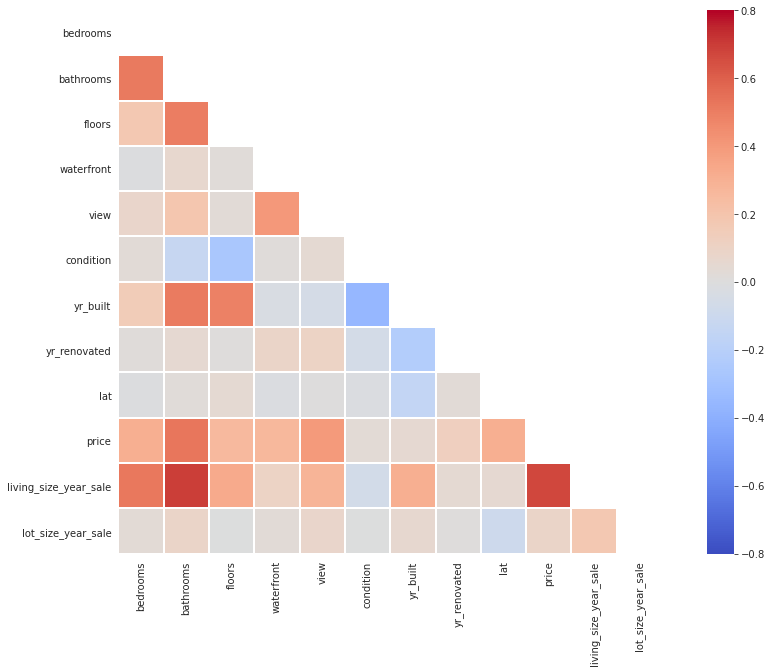

In [47]:
numericals = df.select_dtypes(np.number)
numericals.head()

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [48]:
df.drop(['condition'], axis=1, inplace=True) 

# Check discrete and continuous variables

In [49]:
#I will create checkpoints like this one to make sure to always be able to go back in case of problems
df1=df

#1. Check categorical

In [50]:
categorical = df1.select_dtypes(object)

In [51]:
categorical.nunique()

renovation_grade    4
basement_grade      5
general_grade       5
dtype: int64

In [52]:
#get categorical columns
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]
categorical_columns
categorical_df=df1[categorical_columns]

In [53]:
categorical_df.head()

,renovation_grade,basement_grade,general_grade
0,NR,NB,A
1,R,D,A
2,NR,NB,BA
3,NR,C,A
4,NR,NB,A


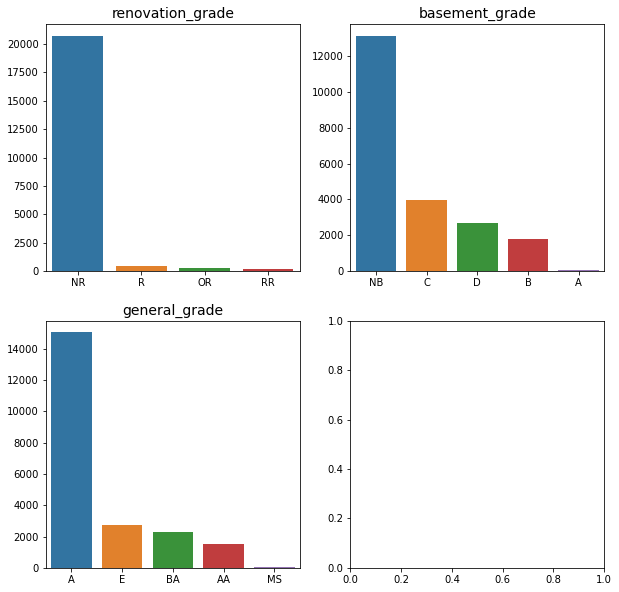

In [54]:
#Visualize the categorical variables

f, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

In [55]:
# 2. Check numericals

In [56]:
numericals = df1.select_dtypes(np.number)
numericals.head()

,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,living_size_year_sale,lot_size_year_sale
0,3,1.00,1.0,0,0,1955,0,47.5112,221900,1180,5650
1,3,2.25,2.0,0,0,1951,1991,47.7210,538000,2570,7242
2,2,1.00,1.0,0,0,1933,0,47.7379,180000,2720,8062
3,4,3.00,1.0,0,0,1965,0,47.5208,604000,1960,5000
4,3,2.00,1.0,0,0,1987,0,47.6168,510000,1800,7503


In [57]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()

bedrooms                   12
bathrooms                  29
floors                      6
waterfront                  2
view                        5
yr_built                  116
yr_renovated               70
lat                      5033
price                    3622
living_size_year_sale     982
lot_size_year_sale       9452
dtype: int64

In [58]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [59]:
discrete_df = numericals[discrete]

In [60]:
discrete

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'yr_built',
 'yr_renovated']

In [61]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

#The enumerate() method adds counter to an iterable and returns it (the enumerate object).

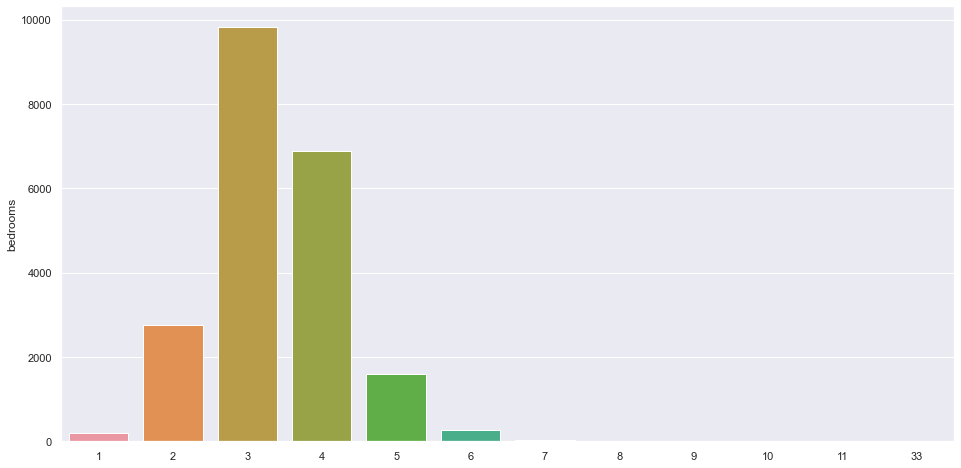

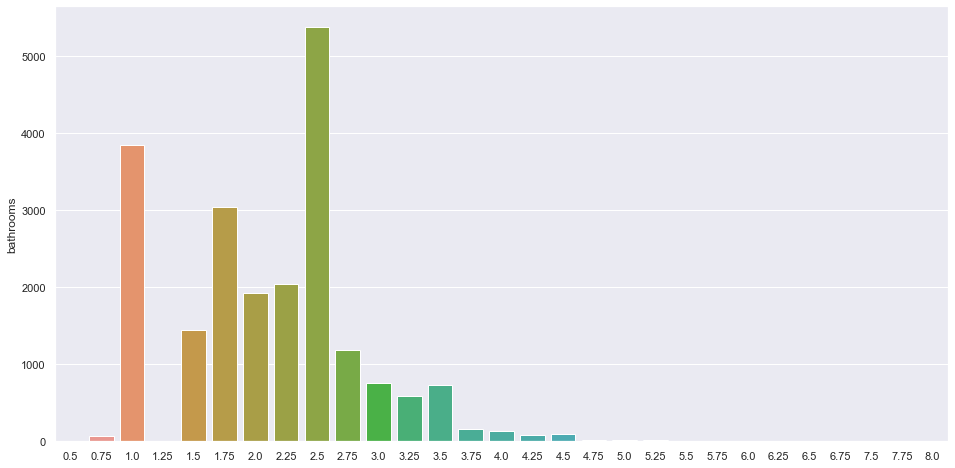

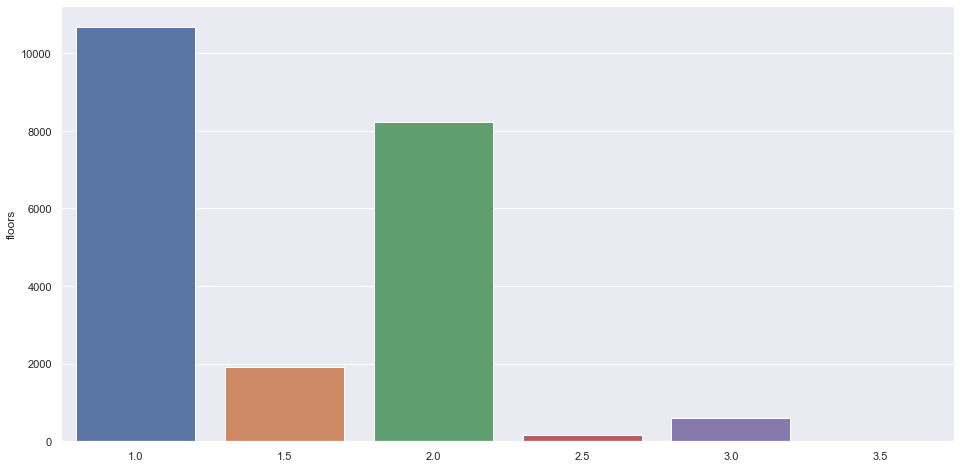

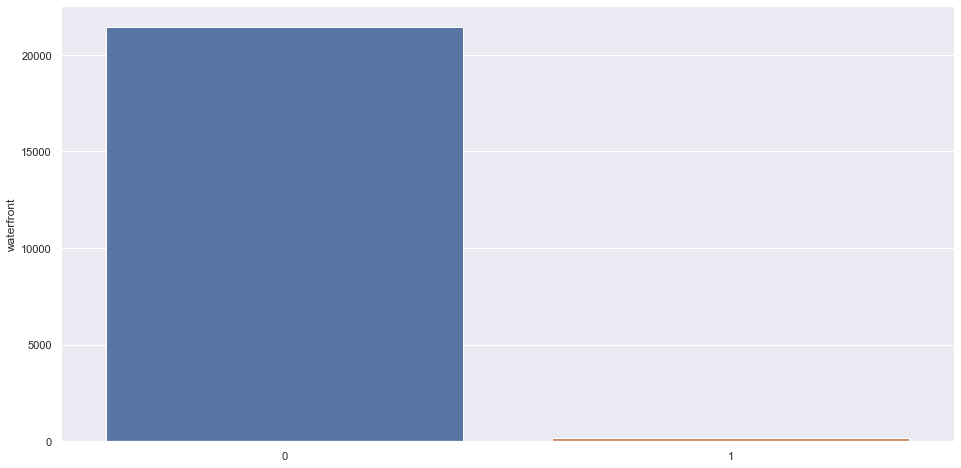

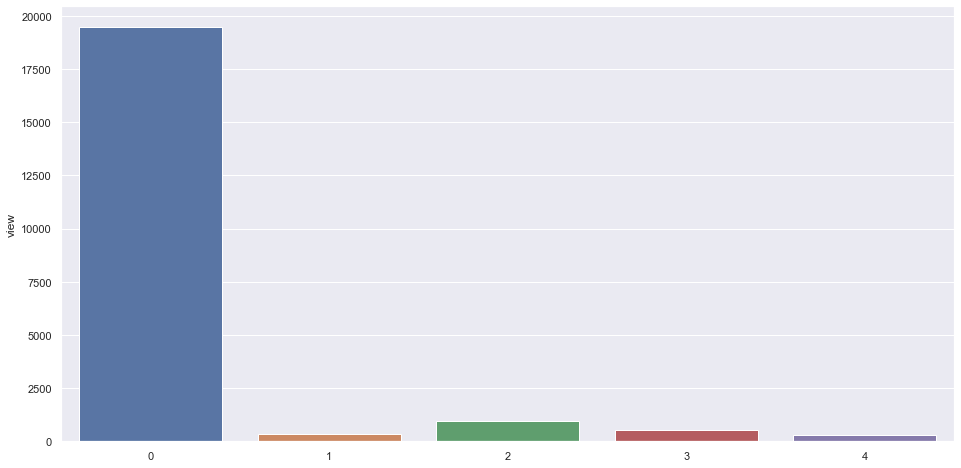

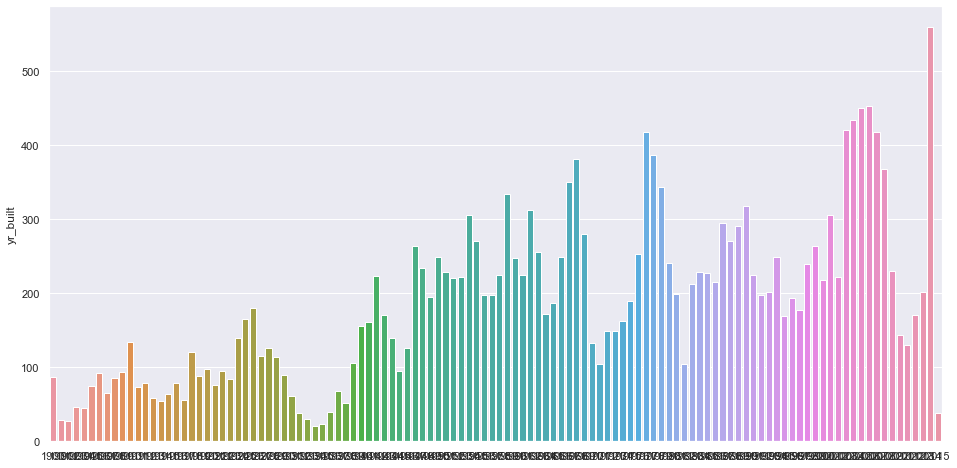

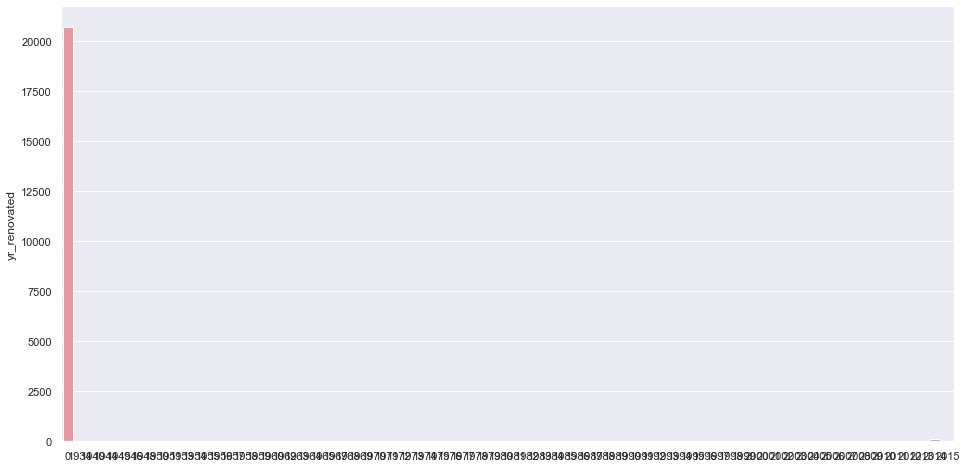

In [62]:
#I visualize the discrete variables

df_bar(discrete_df)

In [63]:
df1.shape

(21597, 15)

In [64]:
df_trans=df1

In [65]:
df_trans.shape

(21597, 15)

In [66]:
df_trans.head()

,date,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,renovation_grade,living_size_year_sale,lot_size_year_sale,basement_grade,general_grade
0,2014-10-13,3,1.00,1.0,0,0,1955,0,47.5112,221900,NR,1180,5650,NB,A
1,2014-12-09,3,2.25,2.0,0,0,1951,1991,47.7210,538000,R,2570,7242,D,A
2,2015-02-25,2,1.00,1.0,0,0,1933,0,47.7379,180000,NR,2720,8062,NB,BA
3,2014-12-09,4,3.00,1.0,0,0,1965,0,47.5208,604000,NR,1960,5000,C,A
4,2015-02-18,3,2.00,1.0,0,0,1987,0,47.6168,510000,NR,1800,7503,NB,A


In [67]:
#Bedrooms and bathrooms need to be readjusted by removing outliers.  

In [68]:
#For bedrooms, I choose 3*iqr as I want to make sure to delete the most extreme outlier, n=33, and not too many of the others.
iqr = np.percentile(df_trans['bedrooms'],75) - np.percentile(df_trans['bedrooms'],25)
upper_limit_bed = np.percentile(df_trans['bedrooms'],75) + 3*iqr #define upper limit
print("The upper wisker is at: %4.2f" % upper_limit_bed)
outliers = df_trans[df_trans['bedrooms'] > upper_limit_bed].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers))

The upper wisker is at: 7.00
The number of points outside the upper wisker is:  24


In [69]:
df_trans = df_trans[df_trans['bedrooms'] <= upper_limit_bed]

In [70]:
df1.shape

(21597, 15)

In [71]:
df_trans.shape

(21573, 15)

In [72]:
#I proceed with the bathrooms
iqr = np.percentile(df_trans['bathrooms'],75) - np.percentile(df_trans['bathrooms'],25)
upper_limit_bath = np.percentile(df_trans['bathrooms'],75) + 1.5*iqr #define upper limit
print("The upper wisker is at: %4.2f" % upper_limit_bath)
outliers = df_trans[df_trans['bathrooms'] > upper_limit_bath].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers))

The upper wisker is at: 3.62
The number of points outside the upper wisker is:  547


In [73]:
df_trans = df_trans[df_trans['bathrooms'] <= upper_limit_bath]

In [74]:
df_trans.shape

(21026, 15)

In [75]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

In [76]:
df_trans_numericals_discrete = df_trans.select_dtypes(np.number)[discrete]

In [77]:
df_trans_numericals_discrete.head()

,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated
0,3,1.00,1.0,0,0,1955,0
1,3,2.25,2.0,0,0,1951,1991
2,2,1.00,1.0,0,0,1933,0
3,4,3.00,1.0,0,0,1965,0
4,3,2.00,1.0,0,0,1987,0


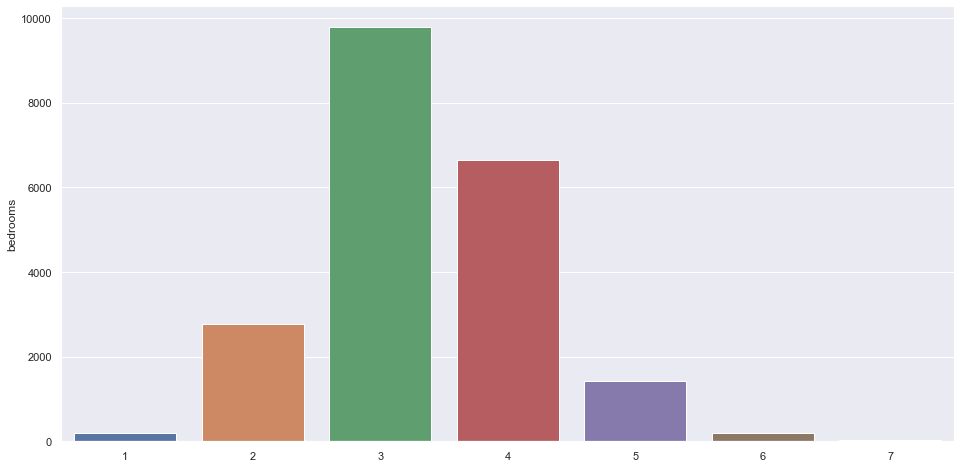

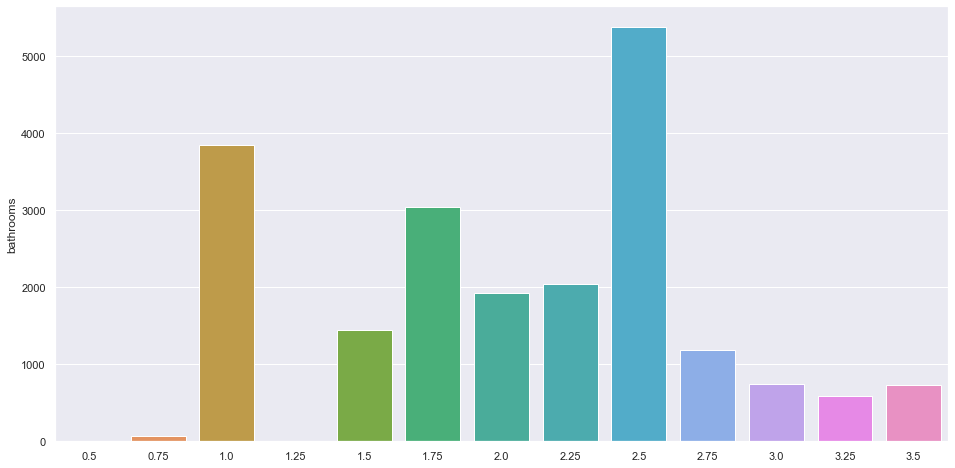

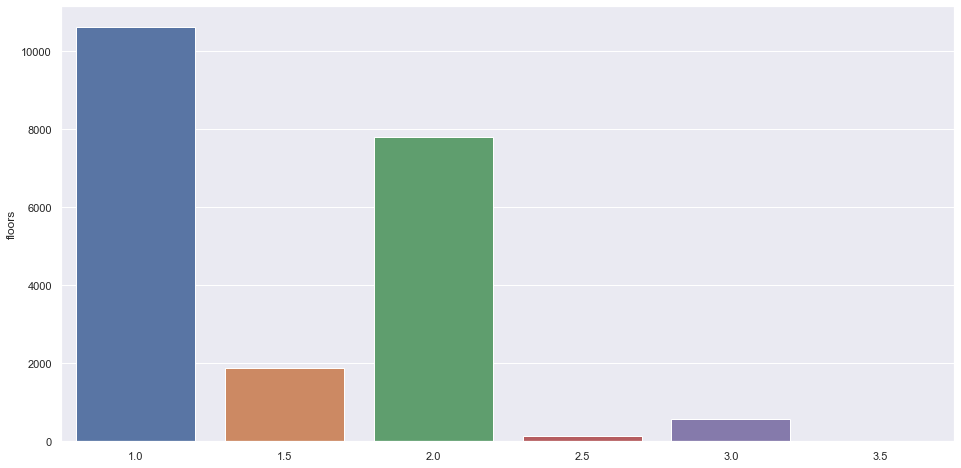

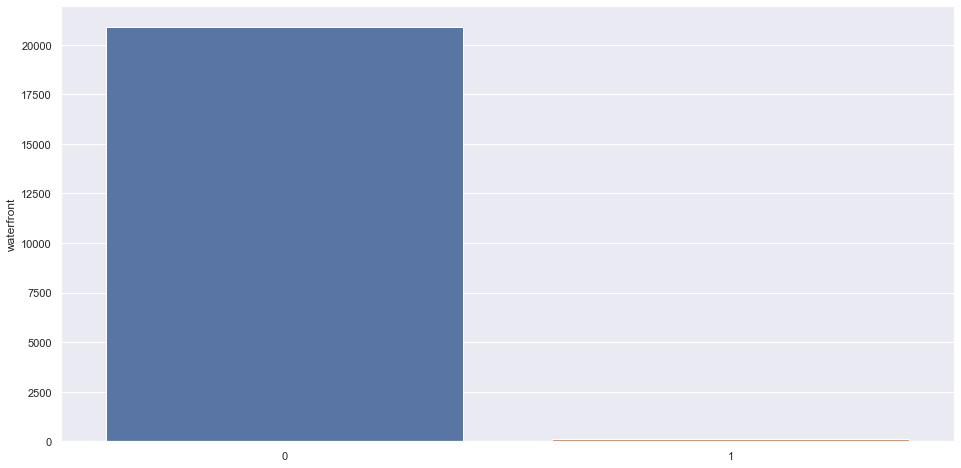

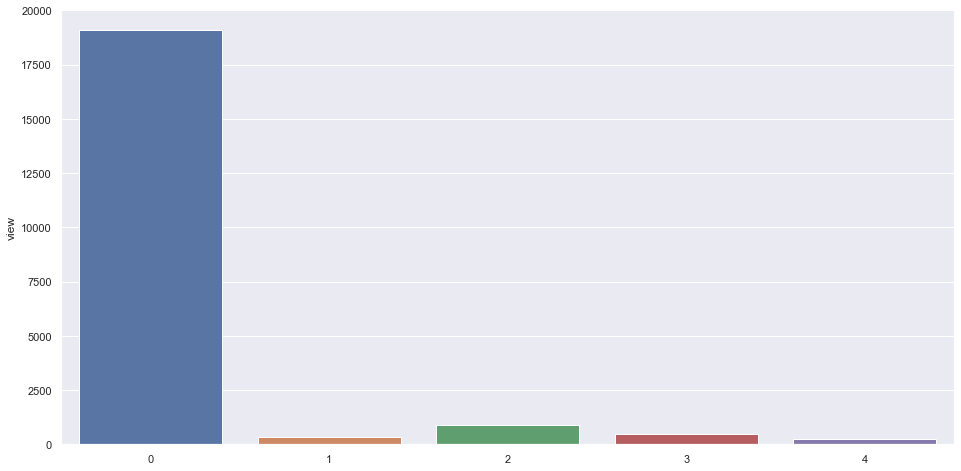

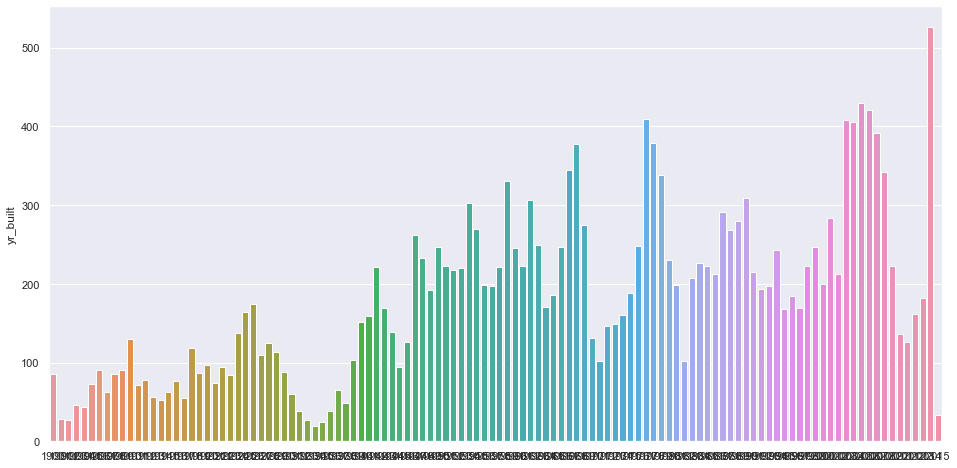

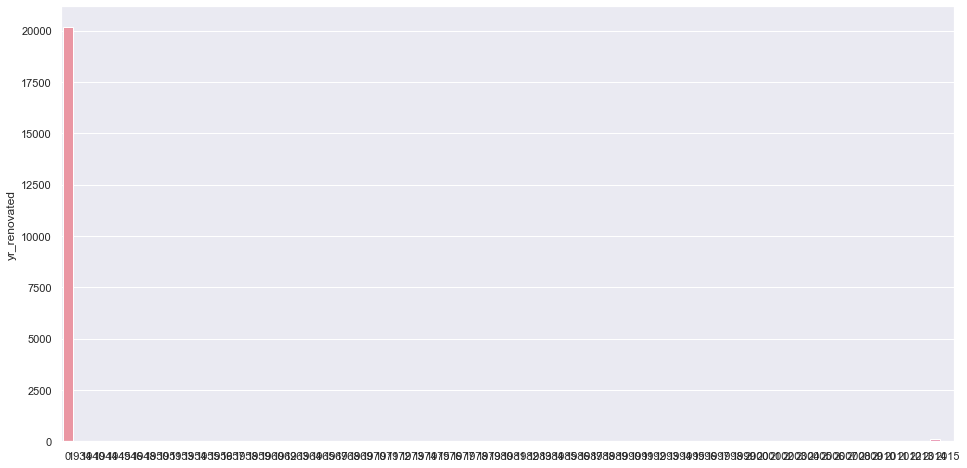

In [78]:
df_bar(df_trans_numericals_discrete)

In [79]:
#continuous variables

In [80]:
df_trans.head()

,date,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,renovation_grade,living_size_year_sale,lot_size_year_sale,basement_grade,general_grade
0,2014-10-13,3,1.00,1.0,0,0,1955,0,47.5112,221900,NR,1180,5650,NB,A
1,2014-12-09,3,2.25,2.0,0,0,1951,1991,47.7210,538000,R,2570,7242,D,A
2,2015-02-25,2,1.00,1.0,0,0,1933,0,47.7379,180000,NR,2720,8062,NB,BA
3,2014-12-09,4,3.00,1.0,0,0,1965,0,47.5208,604000,NR,1960,5000,C,A
4,2015-02-18,3,2.00,1.0,0,0,1987,0,47.6168,510000,NR,1800,7503,NB,A


In [81]:
numericals = df_trans.select_dtypes(np.number)

In [82]:
numericals.shape

(21026, 11)

In [83]:
numericals.head()

,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,living_size_year_sale,lot_size_year_sale
0,3,1.00,1.0,0,0,1955,0,47.5112,221900,1180,5650
1,3,2.25,2.0,0,0,1951,1991,47.7210,538000,2570,7242
2,2,1.00,1.0,0,0,1933,0,47.7379,180000,2720,8062
3,4,3.00,1.0,0,0,1965,0,47.5208,604000,1960,5000
4,3,2.00,1.0,0,0,1987,0,47.6168,510000,1800,7503


In [84]:
continuous = list(numericals.drop(columns = discrete).columns)
continuous

['lat', 'price', 'living_size_year_sale', 'lot_size_year_sale']

In [85]:
continuous_df = numericals.drop(columns = discrete)

In [86]:
continuous_df.head()

,lat,price,living_size_year_sale,lot_size_year_sale
0,47.5112,221900,1180,5650
1,47.7210,538000,2570,7242
2,47.7379,180000,2720,8062
3,47.5208,604000,1960,5000
4,47.6168,510000,1800,7503


In [87]:
continuous_df.shape

(21026, 4)

# Continuous

In [88]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(14,5)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

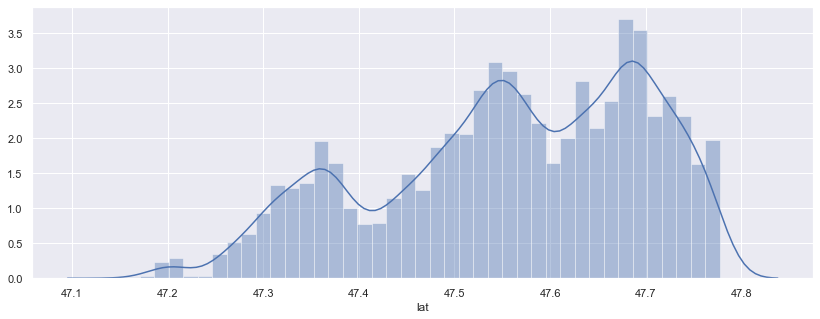

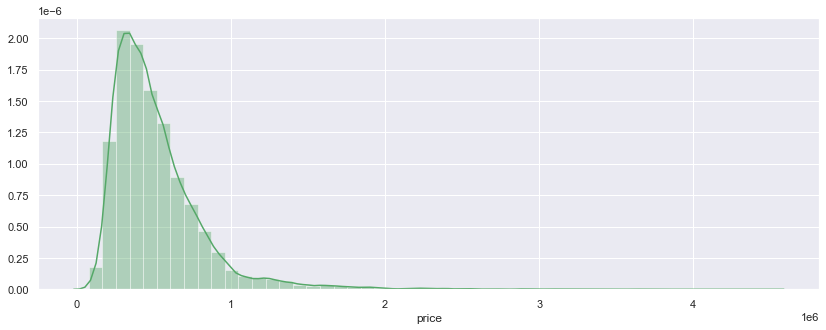

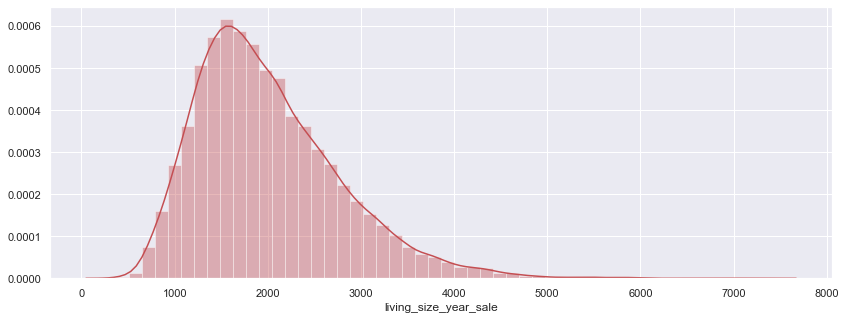

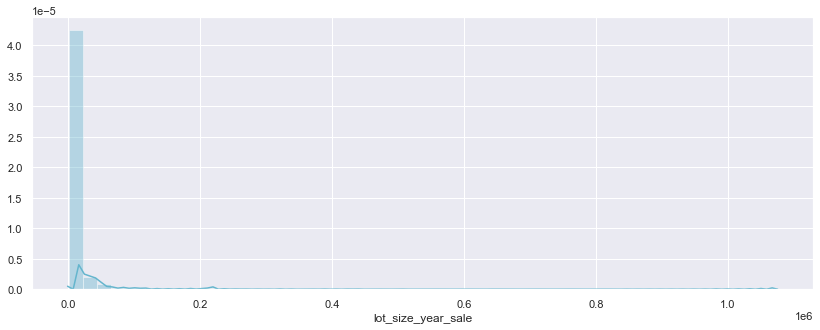

In [89]:
df_hist(continuous_df)


In [90]:
#it looks like all the continuous variables present outliers. I will use a log transformation to rescale them (except for lat, because I am not sure it would be a meaningful move) and see what happens.

# Look for outliers

# log transformation

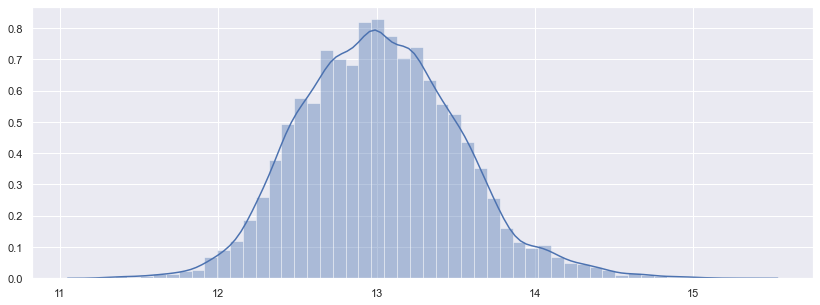

In [91]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 

price_log = list(map(log_transfom_clean, df_trans['price']))
sns.distplot(price_log);
#plt.show()

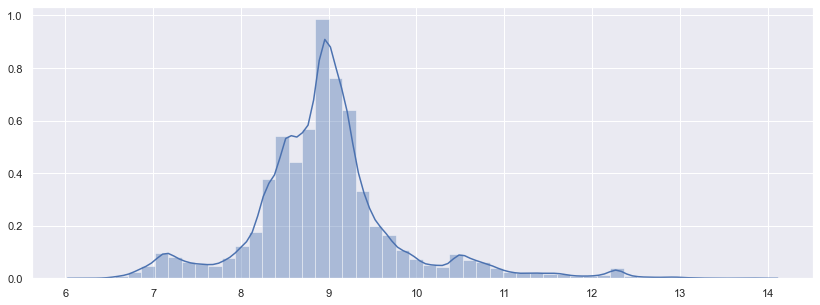

In [92]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
lotsize_log = list(map(log_transfom_clean, df_trans['lot_size_year_sale']))
sns.distplot(lotsize_log);
#plt.show()

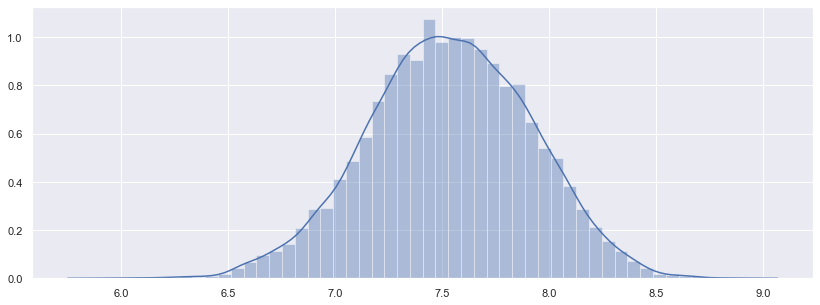

In [93]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
lotsize_log = list(map(log_transfom_clean, df_trans['living_size_year_sale']))
sns.distplot(lotsize_log);
#plt.show()

# Log Transformation

In [94]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return 0 # We are returning NaNs so that we can replace them later

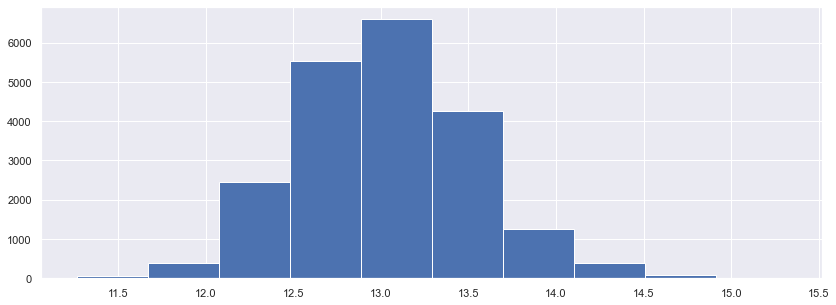

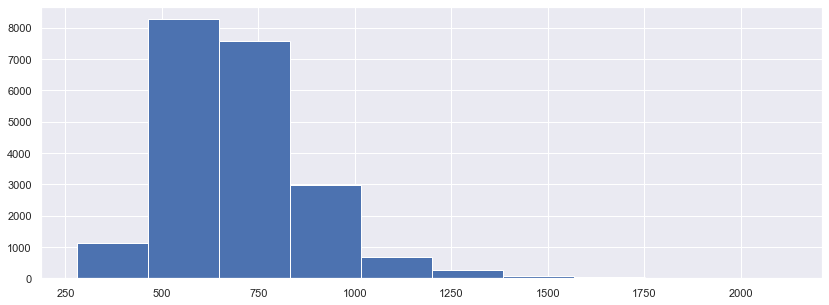

In [95]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean, df_trans['price'])).hist()
plt.show()

pd.Series(map(sqrt_transfom_clean_, df_trans['price'])).hist()
plt.show()

#the log transformation is better, I will keep that

In [96]:
#I decide to apply the logaritmic transformation to the 'price' column.

df_trans['price'] = list(map(log_transfom_clean, df_trans['price']))

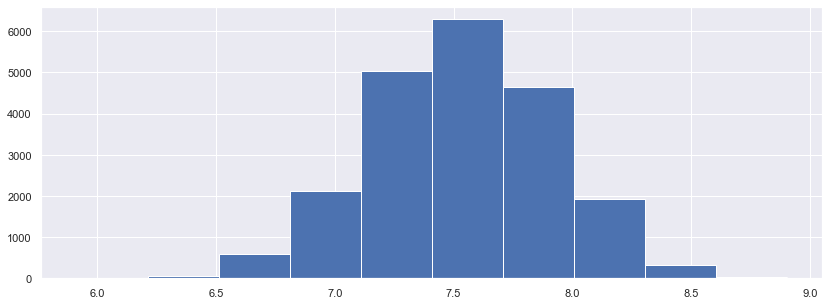

In [97]:
pd.Series(map(log_transfom_clean, df_trans['living_size_year_sale'])).hist()
plt.show()

In [98]:
#apply the logaritmic transformation to the 'living_size' column. As it looks already pretty good, I do not need to compare it with the squared model.

df_trans['living_size_year_sale'] = list(map(log_transfom_clean, df_trans['living_size_year_sale']))

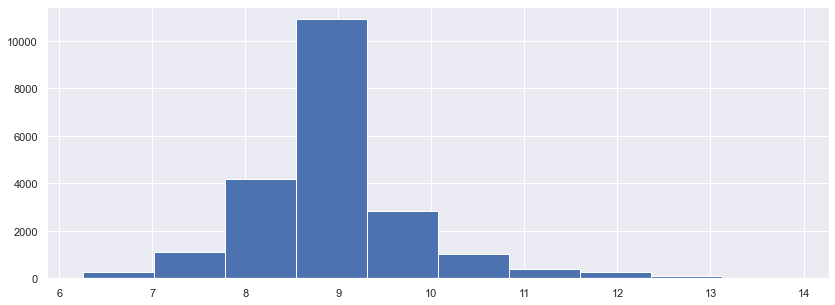

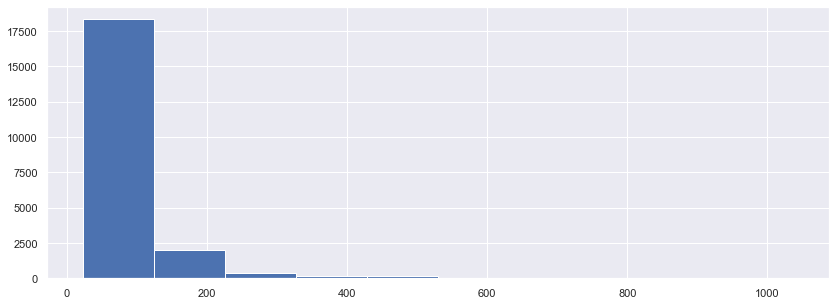

In [99]:
#Also for lot_size, I will compare the two transformation methodologies, and find out that the log is the best one.

pd.Series(map(log_transfom_clean, df_trans['lot_size_year_sale'])).hist()
plt.show()

pd.Series(map(sqrt_transfom_clean_, df_trans['lot_size_year_sale'])).hist()
plt.show()

In [100]:
#I proceed with the transformation. 
df_trans['lot_size_year_sale'] = list(map(sqrt_transfom_clean_, df_trans['lot_size_year_sale']))

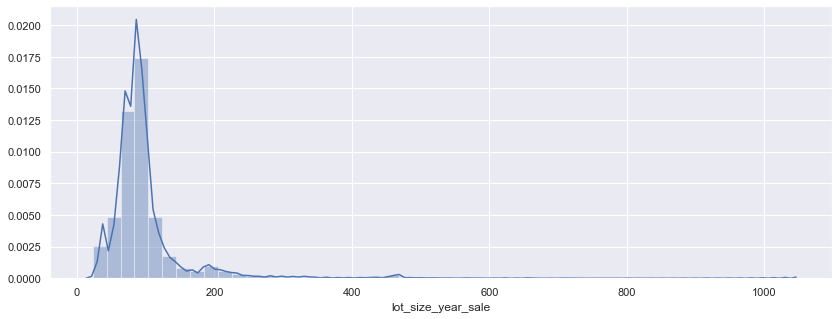

In [101]:
#Even after using the transformation, there is still some skewness in the column lot_size_year_sale . 
#I will remove the outliers only from the right side of the distribution plot.

sns.distplot(df_trans['lot_size_year_sale'])

In [102]:
df['lot_size_year_sale'].value_counts()

5000     366
6000     293
4000     270
7200     224
7500     124
        ... 
42077      1
13423      1
5243       1
13439      1
6147       1
Name: lot_size_year_sale, Length: 9452, dtype: int64

In [103]:
iqr = np.percentile(df_trans['lot_size_year_sale'],75) - np.percentile(df_trans['lot_size_year_sale'],25)
upper_limit_lot = np.percentile(df_trans['lot_size_year_sale'],75) + 3*iqr #define upper limit
print("The upper wisker is at: %4.2f" % upper_limit_lot)
outliers = df_trans[df_trans['lot_size_year_sale'] > upper_limit_lot].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers))

The upper wisker is at: 192.81
The number of points outside the upper wisker is:  1176


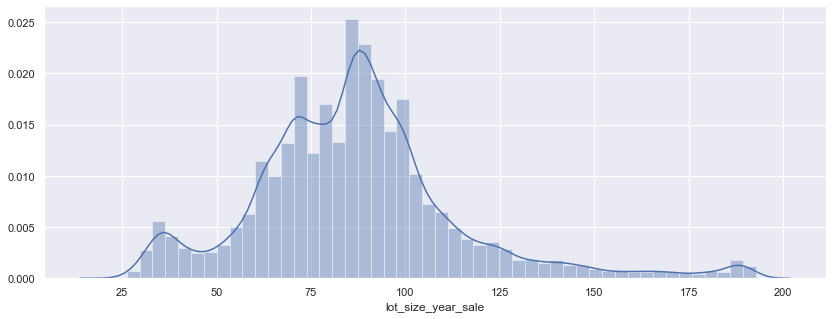

In [104]:
df_trans = df_trans[df_trans['lot_size_year_sale'] <= upper_limit_lot]
sns.distplot(df_trans['lot_size_year_sale'])
plt.show()

#It is not perfect, but it is definitely better.

In [105]:
df_trans.shape

(19850, 15)

In [106]:
df_trans.head()

,date,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,renovation_grade,living_size_year_sale,lot_size_year_sale,basement_grade,general_grade
0,2014-10-13,3,1.00,1.0,0,0,1955,0,47.5112,12.309982,NR,7.073270,75.166482,NB,A
1,2014-12-09,3,2.25,2.0,0,0,1951,1991,47.7210,13.195614,R,7.851661,85.099941,D,A
2,2015-02-25,2,1.00,1.0,0,0,1933,0,47.7379,12.100712,NR,7.908387,89.788641,NB,BA
3,2014-12-09,4,3.00,1.0,0,0,1965,0,47.5208,13.311329,NR,7.580700,70.710678,C,A
4,2015-02-18,3,2.00,1.0,0,0,1987,0,47.6168,13.142166,NR,7.495542,86.619859,NB,A


In [107]:
#I decide to change the waterfront variable into a boolean, turning it into a "True/False" list.
df_trans['waterfront'] = df_trans['waterfront'].astype('bool')


In [108]:
df_trans.head()

,date,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,renovation_grade,living_size_year_sale,lot_size_year_sale,basement_grade,general_grade
0,2014-10-13,3,1.00,1.0,False,0,1955,0,47.5112,12.309982,NR,7.073270,75.166482,NB,A
1,2014-12-09,3,2.25,2.0,False,0,1951,1991,47.7210,13.195614,R,7.851661,85.099941,D,A
2,2015-02-25,2,1.00,1.0,False,0,1933,0,47.7379,12.100712,NR,7.908387,89.788641,NB,BA
3,2014-12-09,4,3.00,1.0,False,0,1965,0,47.5208,13.311329,NR,7.580700,70.710678,C,A
4,2015-02-18,3,2.00,1.0,False,0,1987,0,47.6168,13.142166,NR,7.495542,86.619859,NB,A


In [109]:
categorical.nunique()

renovation_grade    4
basement_grade      5
general_grade       5
dtype: int64

In [110]:
#finally, I turn the categorical variables into dummies.
df_with_dummies = pd.get_dummies(df_trans, columns=['renovation_grade', 'basement_grade', 'general_grade'])


In [111]:
df_with_dummies.head()

,date,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,price,living_size_year_sale,lot_size_year_sale,renovation_grade_NR,renovation_grade_OR,renovation_grade_R,renovation_grade_RR,basement_grade_A,basement_grade_B,basement_grade_C,basement_grade_D,basement_grade_NB,general_grade_A,general_grade_AA,general_grade_BA,general_grade_E,general_grade_MS
0,2014-10-13,3,1.00,1.0,False,0,1955,0,47.5112,12.309982,7.073270,75.166482,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,2014-12-09,3,2.25,2.0,False,0,1951,1991,47.7210,13.195614,7.851661,85.099941,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2015-02-25,2,1.00,1.0,False,0,1933,0,47.7379,12.100712,7.908387,89.788641,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,2014-12-09,4,3.00,1.0,False,0,1965,0,47.5208,13.311329,7.580700,70.710678,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2015-02-18,3,2.00,1.0,False,0,1987,0,47.6168,13.142166,7.495542,86.619859,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [112]:
#Now that I have the model ready, I can start with the analysis.

In [113]:
df_final=df_with_dummies

In [114]:
df_final.columns #to get the x variable names

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'yr_built', 'yr_renovated', 'lat', 'price', 'living_size_year_sale',
       'lot_size_year_sale', 'renovation_grade_NR', 'renovation_grade_OR',
       'renovation_grade_R', 'renovation_grade_RR', 'basement_grade_A',
       'basement_grade_B', 'basement_grade_C', 'basement_grade_D',
       'basement_grade_NB', 'general_grade_A', 'general_grade_AA',
       'general_grade_BA', 'general_grade_E', 'general_grade_MS'],
      dtype='object')

In [115]:
y = df_final['price']
X = df_final[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'yr_built', 'yr_renovated', 'lat','living_size_year_sale',
       'lot_size_year_sale', 'renovation_grade_NR', 'renovation_grade_OR',
       'renovation_grade_R', 'renovation_grade_RR', 'basement_grade_A',
       'basement_grade_B', 'basement_grade_C', 'basement_grade_D',
       'basement_grade_NB', 'general_grade_A', 'general_grade_AA',
       'general_grade_BA', 'general_grade_E', 'general_grade_MS']]

In [116]:
X

,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,lat,living_size_year_sale,lot_size_year_sale,renovation_grade_NR,renovation_grade_OR,renovation_grade_R,renovation_grade_RR,basement_grade_A,basement_grade_B,basement_grade_C,basement_grade_D,basement_grade_NB,general_grade_A,general_grade_AA,general_grade_BA,general_grade_E,general_grade_MS
0,3,1.00,1.0,False,0,1955,0,47.5112,7.073270,75.166482,1,0,0,0,0,0,0,0,1,1,0,0,0,0
1,3,2.25,2.0,False,0,1951,1991,47.7210,7.851661,85.099941,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2,1.00,1.0,False,0,1933,0,47.7379,7.908387,89.788641,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,3.00,1.0,False,0,1965,0,47.5208,7.580700,70.710678,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3,2.00,1.0,False,0,1987,0,47.6168,7.495542,86.619859,1,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,False,0,2009,0,47.6993,7.333023,33.630343,1,0,0,0,0,0,0,0,1,1,0,0,0,0
21593,4,2.50,2.0,False,0,2014,0,47.5107,7.512071,84.852814,1,0,0,0,0,0,0,0,1,1,0,0,0,0
21594,2,0.75,2.0,False,0,2009,0,47.5944,6.927558,36.742346,1,0,0,0,0,0,0,0,1,1,0,0,0,0
21595,3,2.50,2.0,False,0,2004,0,47.5345,7.251345,35.874782,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [117]:
#I will split the dataset in two, one for training and one for testing (40% OF THE DATA)
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4) 

In [119]:
len(X_train)

11910

In [120]:
for data in (X_train, X_test, y_train, y_test):
    print(len(data))

11910
7940
11910
7940


In [121]:
X_train.dtypes

bedrooms                   int64
bathrooms                float64
floors                   float64
waterfront                  bool
view                       int64
yr_built                   int64
yr_renovated               int64
lat                      float64
living_size_year_sale    float64
lot_size_year_sale       float64
renovation_grade_NR        uint8
renovation_grade_OR        uint8
renovation_grade_R         uint8
renovation_grade_RR        uint8
basement_grade_A           uint8
basement_grade_B           uint8
basement_grade_C           uint8
basement_grade_D           uint8
basement_grade_NB          uint8
general_grade_A            uint8
general_grade_AA           uint8
general_grade_BA           uint8
general_grade_E            uint8
general_grade_MS           uint8
dtype: object

In [122]:
#create a linear regression
from sklearn.linear_model import LinearRegression


In [123]:
lm = LinearRegression()

In [124]:
m=lm.fit(X_train,y_train) #calling the model m

In [125]:
lm.intercept_ #our model calculated the intercept

-52.17175065052059

In [126]:
lm.coef_ #coefficient calculated by our model

array([-1.45255805e-02,  1.11783006e-01,  6.50323148e-02,  4.27809199e-01,
        7.73254284e-02, -3.76460748e-03,  1.74283457e-03,  1.39578772e+00,
        4.54872401e-01, -7.34383906e-04,  2.58933739e+00, -8.98600505e-01,
       -8.29083122e-01, -8.61653762e-01,  7.40705320e-02,  7.87007861e-04,
       -3.09753649e-02, -1.86681582e-03, -4.20153592e-02, -3.34494505e-02,
        4.41503171e-01, -2.36304420e-01,  2.64831204e-01, -4.36580505e-01])

In [127]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
bedrooms,-0.014526
bathrooms,0.111783
floors,0.065032
waterfront,0.427809
view,0.077325
yr_built,-0.003765
yr_renovated,0.001743
lat,1.395788
living_size_year_sale,0.454872
lot_size_year_sale,-0.000734


In [128]:
#By looking at the coefficients, it is curious to observe that the number of bedrooms has a negative coefficient, while this 
#vaiable is supposed to be correlated to a higher living space. This is probably linked to the fact that the price adjusted to the market demand. 
#Moreover, waterfront, living size year by the time of the sale, and the general grade have the strongest positive impact on the dependent variable. 

In [129]:
y_pred = lm.predict(X_test)

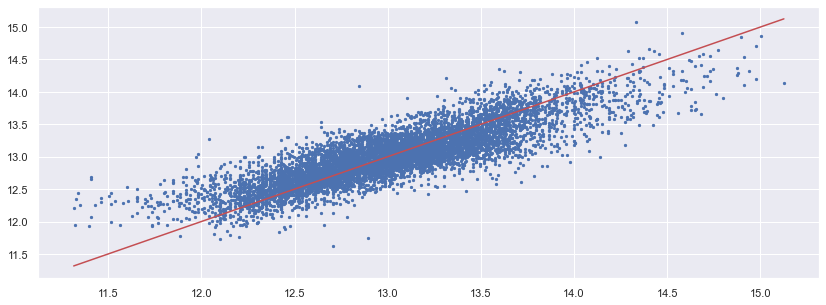

In [130]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(min(y_test), max(y_test)),
         np.linspace(min(y_test), max(y_test)), c='r') #creating a line that goes throw two points
plt.scatter(y_test,y_pred, s=5) #SHIFT + TAB TO OPEN FUNCTIONS

#in the scatterplot, on the y we have data that are predicted through our model, and on the x we have the actual observations

In [131]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [132]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [133]:
#Model Output
# a. Coefficients
print(m.coef_)

[-1.45255805e-02  1.11783006e-01  6.50323148e-02  4.27809199e-01
  7.73254284e-02 -3.76460748e-03  1.74283457e-03  1.39578772e+00
  4.54872401e-01 -7.34383906e-04  2.58933739e+00 -8.98600505e-01
 -8.29083122e-01 -8.61653762e-01  7.40705320e-02  7.87007861e-04
 -3.09753649e-02 -1.86681582e-03 -4.20153592e-02 -3.34494505e-02
  4.41503171e-01 -2.36304420e-01  2.64831204e-01 -4.36580505e-01]


In [134]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.20
The mean squared error of the model in the test set is:   0.07
The root mean squared error of the model in the test set is:   0.27
The R2 of the model in the test set is: 0.72


In [135]:
#According to the results, the model seems to be a good fit. 
#The MSE is pretty low, and the R2 shows that the independent variables in our model describe 
#our dependent variable quite efficiently, with 0.72 as a score. 


---

### Evaluating the statistical performance with statsmodels

In [136]:
import statsmodels.api as sm

In [137]:
# Checking that the shapes of the dataframes are correct, we check the statistical model on the entire dataset
print(X.shape)
print(y.shape)

(19850, 24)
(19850,)


##### Preparing data for statsmodels

In [138]:
# We need to add a constant to X for statsmodels 
X_stats = sm.add_constant(X)

In [139]:
# We also need to cast the data to floats for statsmodels 
model = sm.OLS(y.astype(float), X_stats.astype(float)).fit()

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2417.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:03:58   Log-Likelihood:                -1858.6
No. Observations:               19850   AIC:                             3761.
Df Residuals:                   19828   BIC:                             3935.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -33.4964      1.190    -28.142      0.000     -35.829     -31.163
bedrooms                 -0.0111      0.003     -3.968      0.000      -0.017      -0.006
bathrooms                 0.1129      0.005     23.485      0.000       0.103       0.122
floors                    0.0667      0.005     12.671      0.000       0.056       0.077
waterfront                0.4154      0.027     15.267      0.000       0.362       0.469
view                      0.0768      0.003     25.156      0.000       0.071       0.083
yr_built                 -0.0038   9.03e-05    -42.092      0.000      -0.004      -0.004
yr_renovated              0.0035      0.001      2.885      0.004       0.001       0.006
lat                       1.4073      0.015     97.014      0.000       1.379       1.436
living_size_year_sale     0.4553      0.009     50.665      0.000       0.438       0.473
lot_size_year_sale       -0.0007    8.5e-05     -8.273      0.000      -0.001      -0.001
renovation_grade_NR      -3.1681      1.543     -2.053      0.040      -6.193      -0.143
renovation_grade_OR     -10.1265      0.863    -11.737      0.000     -11.818      -8.435
renovation_grade_R      -10.0749      0.891    -11.301      0.000     -11.822      -8.328
renovation_grade_RR     -10.1270      0.907    -11.164      0.000     -11.905      -8.349
basement_grade_A         -6.6081      0.241    -27.372      0.000      -7.081      -6.135
basement_grade_B         -6.7062      0.238    -28.136      0.000      -7.173      -6.239
basement_grade_C         -6.7359      0.238    -28.281      0.000      -7.203      -6.269
basement_grade_D         -6.7052      0.238    -28.160      0.000      -7.172      -6.239
basement_grade_NB        -6.7410      0.238    -28.328      0.000      -7.207      -6.275
general_grade_A          -6.7432      0.238    -28.296      0.000      -7.210      -6.276
general_grade_AA         -6.2762      0.239    -26.260      0.000      -6.745      -5.808
general_grade_BA         -6.9449      0.238    -29.209      0.000      -7.411      -6.479
general_grade_E          -6.4500      0.239    -27.020      0.000      -6.918      -5.982
general_grade_MS         -7.0821      0.242    -29.316      0.000      -7.556      -6.609
==============================================================================
Omnibus:                      441.260   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.450
Skew:                           0.074   Prob(JB):                    1.37e-210
Kurtosis:                       4.071   Cond. No.                     3.23e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [141]:
#We get the same results, with R2=0.719 and very low or null p-value for almost all the variables.